
# **Feet Size Calculator**

In [6]:
#reference from https://universe.roboflow.com/ashhar-ali-cnkpk/foot-detection-updated/model/1

#To install the dependencies required to run the API

#!pip install roboflow supervision opencv-python

In [7]:
#reference from https://universe.roboflow.com/ashhar-ali-cnkpk/foot-detection-updated/model/1

#To insatll Dependencies to mkae http requests
#!pip install inference-sdk

In [8]:
#reference from https://chat.openai.com/
# reference from https://claude.ai/
#refence from https://github.com/wildoctopus/

import sys
from skimage.io import imread  # Read an image from a file into an array
import numpy as np  #Fundamental package for scientific computing with Python
import matplotlib.pyplot as plt # Plotting library for Python
%matplotlib inline
from scipy import ndimage # Multi-dimensional image processing
from imutils import contours # A series of convenience functions to make basic image processing functions easier
import imutils
import cv2 #Opencv
from google.colab.patches import cv2_imshow #Display Opencv images in google colab
from sklearn.cluster import KMeans #Algorithm for KNN
import random as rng #generte random color
from inference_sdk import InferenceHTTPClient #this is api client to make HTTP request

In [9]:
#reference from https://chat.openai.com/
#reference from https://claude.ai/

#Function for user consent
def take_consent():
  #Asking user for consent
    consent = input("Do you consent to proceed with the feet size predicator? (yes/no): ").lower()
    if consent == "yes":
        print("Great! Proceeding to calculate size")
        return True
    elif consent == "no":
        print("We make sure of user privacy, but we understand if you do not want to consent. Thanks!!")
        return False
    else:
        print("Invalid input. Please respond with 'yes' or 'no'.")
        return take_consent() #To call the function again if input is invalid


In [10]:
#reference from https://chat.openai.com/
#reference from https://claude.ai/

#check if user consnet is true or false
if take_consent():
    # Proceed with code execution if consent given
    print("....")
else:
    #Exit the program if consent not given
    print("You did not Consent. Exiting....")
    sys.exit() # terminates the code if no consent
from google.colab import drive #mounting drive to access the files
drive.mount('/content/drive')

image_path = '/content/drive/MyDrive/FNP/rightfeet.jpg'
ogimage = imread(image_path)

Do you consent to proceed with the feet size predicator? (yes/no): yes
Great! Proceeding to calculate size
....
Mounted at /content/drive


In [11]:
#reference from https://universe.roboflow.com/ashhar-ali-cnkpk/foot-detection-updated/model/1
#reference from https://chat.openai.com/

def detect_feet_API(image_path): #Function to detect feet using Roboflow API
    from roboflow import Roboflow # Import necessary libraries for using Roboflow API
    import supervision as sv
    import cv2

    # Import necessary libraries for using Roboflow API
    rf = Roboflow(api_key="QPRanIDRYcLYvfEbmJk9")
    # Get project from Roboflow workspace
    project = rf.workspace().project("foot-detection-updated")
    # Get model version from project
    model = project.version(1).model
    # Make prediction using model and image path
    result = model.predict(image_path, confidence=40, overlap=30).json()
    # Extract labels from prediction result
    labels = [item["class"] for item in result["predictions"]]
    # Convert prediction result to Detections object
    detections = sv.Detections.from_roboflow(result)

    return detections

In [12]:
#reference from https://universe.roboflow.com/ashhar-ali-cnkpk/foot-detection-updated/model/1
#reference from https://chat.openai.com/

# Detect feet using Roboflow API
detections = detect_feet_API(image_path)
# Check if feet are detected
if detections:
    print("Feet detected. Proceeding with further processing.")

else:
  # Exit program if feet are not detected
    print("Feet not detected. Exiting.")
    sys.exit() # terminates the code feet not detected

loading Roboflow workspace...
loading Roboflow project...
Feet detected. Proceeding with further processing.


from_roboflow is deprecated: `Detections.from_roboflow` is deprecated and will be removed in `supervision-0.22.0`. Use `Detections.from_inference` instead.


In [13]:
#reference from https://chat.openai.com/
#reference from https://claude.ai/
#refence from https://github.com/wildoctopus/

def preprocess(image):
    # Convert image to HSV color space
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
#apply gaussin blur to smooth image
    image = cv2.GaussianBlur(image, (9, 9), 0)
    #normalize image pixel
    image = image/255

    return image


In [14]:
#reference from https://chat.openai.com/
#reference from https://claude.ai/
#refence from https://github.com/wildoctopus/

def plotImage(image):

    plt.imshow(image)#display image
    plt.show()#plotimge

In [15]:
#reference from https://chat.openai.com/
#reference from https://claude.ai/
#refence from https://github.com/wildoctopus/

def crop_image(rectangle, ogimage):

    x,y,w,h = rectangle # Extract coordinates and dimensions of rectangle

    print(x,y,w,h)
    precropedimage = ogimage[y:y+h,x:x+w] #crop original image
     #getting dimension of cropped image
    x1, y1, w1, h1 = 0, 0, precropedimage.shape[1], precropedimage.shape[0]
    #top and bottom margin
    y2 = int(h1/10)
    #left and right margin
    x2 = int(w1/10)
    #Additional cropping
    cropone = precropedimage[y1+y2:h1-y2,x1+x2:w1-x2]

    #get final cropped image dimension
    ix, iy, iw, ih = x+x2, y+y2, cropone.shape[1], cropone.shape[0]
    #final cropped image
    croppedimage = ogimage[iy:iy+ih,ix:ix+iw]

    return croppedimage, precropedimage

In [16]:
#reference from https://chat.openai.com/
#reference from https://claude.ai/
#refence from https://github.com/wildoctopus/

def Imageoverlay(croppedimage, precropedimage):

    #dimension of orginal image
    x1, y1, w1, h1 = 0, 0, precropedimage.shape[1], precropedimage.shape[0]
    #top and bottom margin
    y2 = int(h1/10)
    #left and right margin
    x2 = int(w1/10)
    #create blank image
    image1 = np.zeros((precropedimage.shape[0], precropedimage.shape[1], 3), np.uint8)
    image1[:, 0:precropedimage.shape[1]] = (255, 0, 0)#for blue background
    #overlay cropped image
    image1[ y1+y2:y1+y2+croppedimage.shape[0], x1+x2:x1+x2+croppedimage.shape[1]] = croppedimage

    return image1


In [17]:
#reference from https://chat.openai.com/
#reference from https://claude.ai/
#refence from https://github.com/wildoctopus/

def KNN(image):

     #reshape image for clustering
    image2d = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
    #apply knn
    knn = KMeans(n_clusters=2, random_state=0).fit(image2d)
    clustOut = knn.cluster_centers_[knn.labels_] #cluster image
    #reshape image
    clustered3D = clustOut.reshape(image.shape[0], image.shape[1], image.shape[2])
    #convert image to uint8 format
    clustered_img = np.uint8(clustered3D*255)

    return clustered_img

In [18]:
#reference from https://chat.openai.com/
#reference from https://claude.ai/
#refence from https://github.com/wildoctopus/

def Bound_Box(image):
    #find contours in image
    contours, _ = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #sort contours
    contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)


    #list to store Contours
    contours_poly = [None]*len(contours)
    rectBound = [None]*len(contours)#initialize list to store bounding rectangle

    for i, c in enumerate(contours):
        contours_poly[i] = cv2.approxPolyDP(c, 3, True)#approxiamte contour with polygon
        rectBound[i] = cv2.boundingRect(contours_poly[i])#recive bounding box


    return rectBound, contours, contours_poly, image

In [19]:
#reference from https://chat.openai.com/
#reference from https://claude.ai/
#refence from https://github.com/wildoctopus/

#Function to draw Contours and bounding box on image
def drawntC(rectangle, contours, cntPoly, image):
    #create blank image
    drawn = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

    #get coordiantes and dimensions of rectangle
    paper = rectangle

    for i in range(len(contours)):
      color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))#genearte random color
      cv2.drawContours(drawn, cntPoly, i, color)#draw the contours
    cv2.rectangle(drawn, (int(paper[0]), int(paper[1])), \
              (int(paper[0]+paper[2]), int(paper[1]+paper[3])), color, 2)#draw the rectangle

    return drawn

In [20]:
#reference from https://chat.openai.com/
#reference from https://claude.ai/
#refence from https://github.com/wildoctopus/

def edgeDetection(clustered_img):
  edged1 = cv2.Canny(clustered_img, 0, 255)#apply canny edge detection
  edged = cv2.dilate(edged1, None, iterations=1) #dilate edges
  edged = cv2.erode(edged, None, iterations=1) #erode edges
  return edged

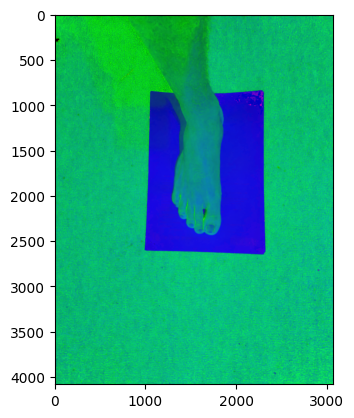

In [21]:
#preprocess original image
preprocessedimage = preprocess(ogimage)
plotImage(preprocessedimage)#plot image

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


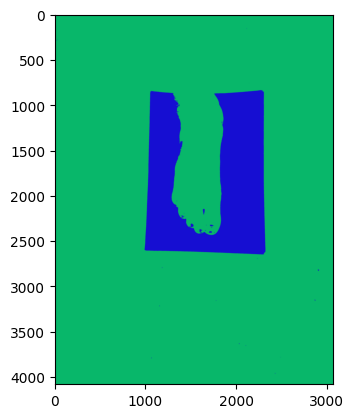

In [22]:
#Perform clustering on preprocessed image
clustered_img = KNN(preprocessedimage)
plotImage(clustered_img)#plot image


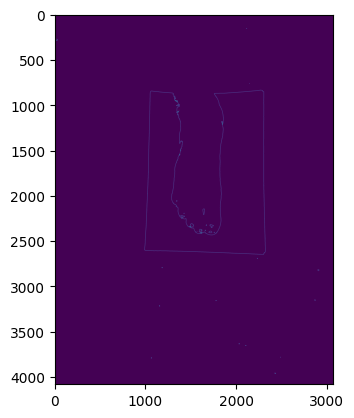

In [23]:
#perform edge detection on clustered image
edgedimage = edgeDetection(clustered_img)
plotImage(edgedimage)#plot image

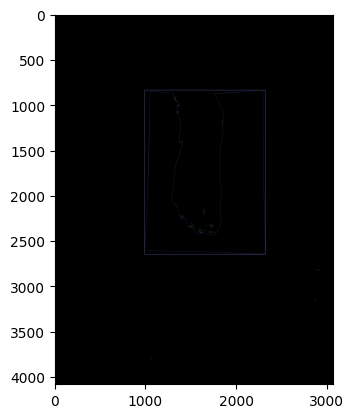

In [24]:
#find bounding box around contours on edgedimage
rectBound, contours, contours_poly, image = Bound_Box(edgedimage)
#draw the bounding box on image
pdraw = drawntC(rectBound[1], contours, contours_poly, image)
plotImage(pdraw)#plot image with bounding box

986 839 1331 1811


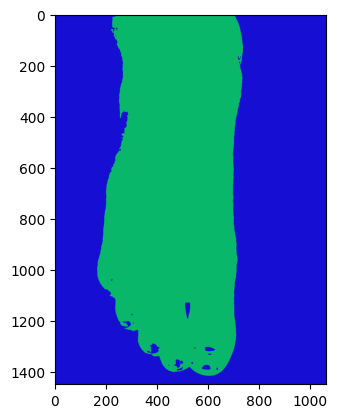

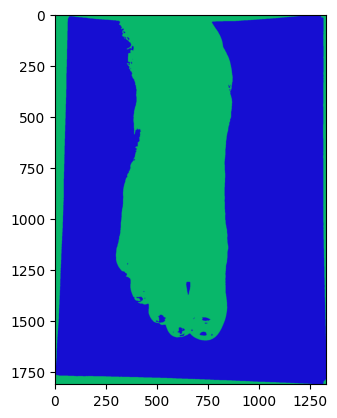

In [25]:
#crop image based on rectangle and clustered image
croppedimage, precropedimage = crop_image(rectBound[1], clustered_img)
plotImage(croppedimage)#plot cropped image
plotImage(precropedimage)#plot precropped image

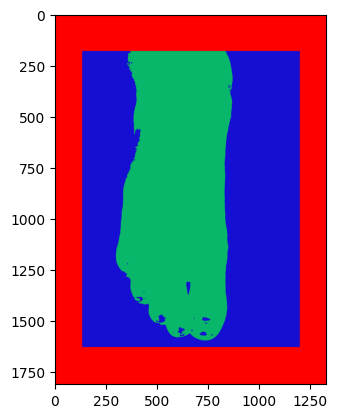

In [26]:
#overlay the cropped and precropped image to remove discrepancies
overlayedimage = Imageoverlay(croppedimage, precropedimage)
plotImage(overlayedimage)#plot overlayed image

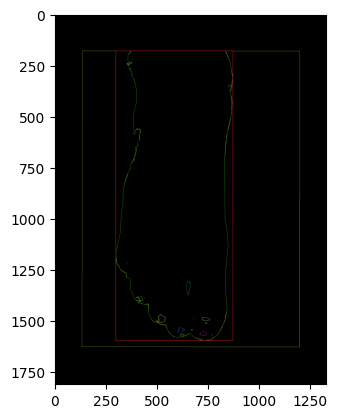

In [27]:
#perform edge detection on overlayed image
fedged = edgeDetection(overlayedimage)
#find bounding box around the overlayed image
frectBound, fcnt, fcntpoly, fimage = Bound_Box(fedged)
#Draw the bounding box around the overlayed image
fdraw = drawntC(frectBound[2], fcnt, fcntpoly, fimage)
plotImage(fdraw)#plot image with edge detection and bound box


In [30]:
#reference from https://chat.openai.com/
#reference from https://claude.ai/
#refence from https://github.com/wildoctopus/

#Function to calcuate the feet size
def final_feet_cal(precropedimage, frectBound):
  x1, y1, w1, h1 = 0, 0, precropedimage.shape[1], precropedimage.shape[0]#dimension of precropped image

  y2 = int(h1/10)#top and bottom margin

  x2 = int(w1/10)#left and right margin

  hf = y2 + frectBound[2][3]#calculate height of feet
  wf = x2 + frectBound[2][2]#calculate width of feet
  hp = precropedimage.shape[0] #height of pre cropped image
  wp = precropedimage.shape[1] #width of precropped image

  print("Feet height: ", hf)
  print("Feet Width: ", wf)

  print("Paper height: ", hp)
  print("Paper Width: ", wp)

  pwo = 210 #standard paper width
  pho = 297 #standard paper height

  fso = 0.0

  if wf>hf:
    fso = (pho/wp)*wf#calculate feet size based on width
  else :
    fso = (pho/hp)*hf#calculate feet baaed on height



  return fso

#print the final feet size
print("feet size (cm): ", final_feet_cal(precropedimage, frectBound)/10)

Feet height:  1599
Feet Width:  706
Paper height:  1811
Paper Width:  1331
feet size (cm):  26.223246824958586
